<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC)_

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("/Users/Indraja/Documents/Dsi/7.3.4_clustering-intro_to_clustering_kmeans-lab/datasets/seeds.csv")

In [3]:
# A:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

In [4]:
# A:
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

In [5]:
seeds.dtypes

area               float64
perimeter          float64
compactness        float64
length             float64
width              float64
asymmetry_coeff    float64
groove_length      float64
species              int64
dtype: object

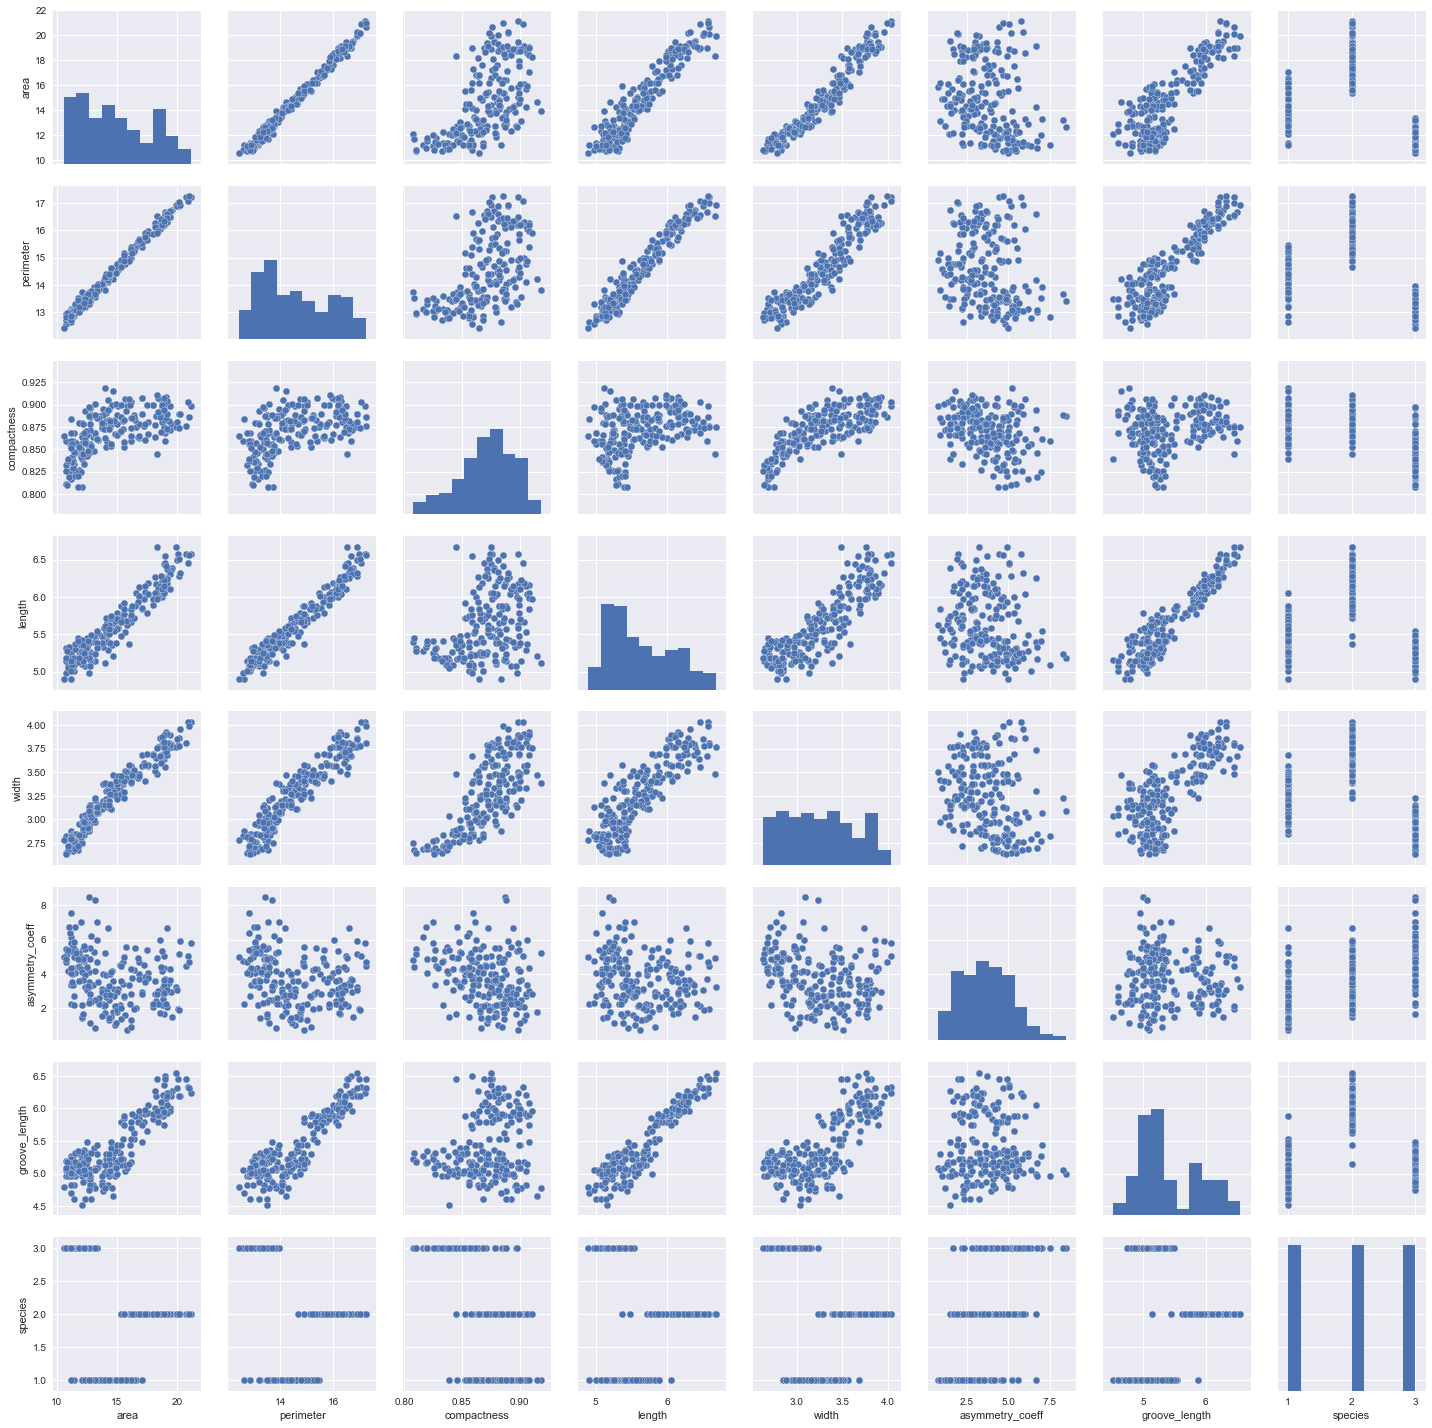

In [7]:
sns.pairplot(seeds)

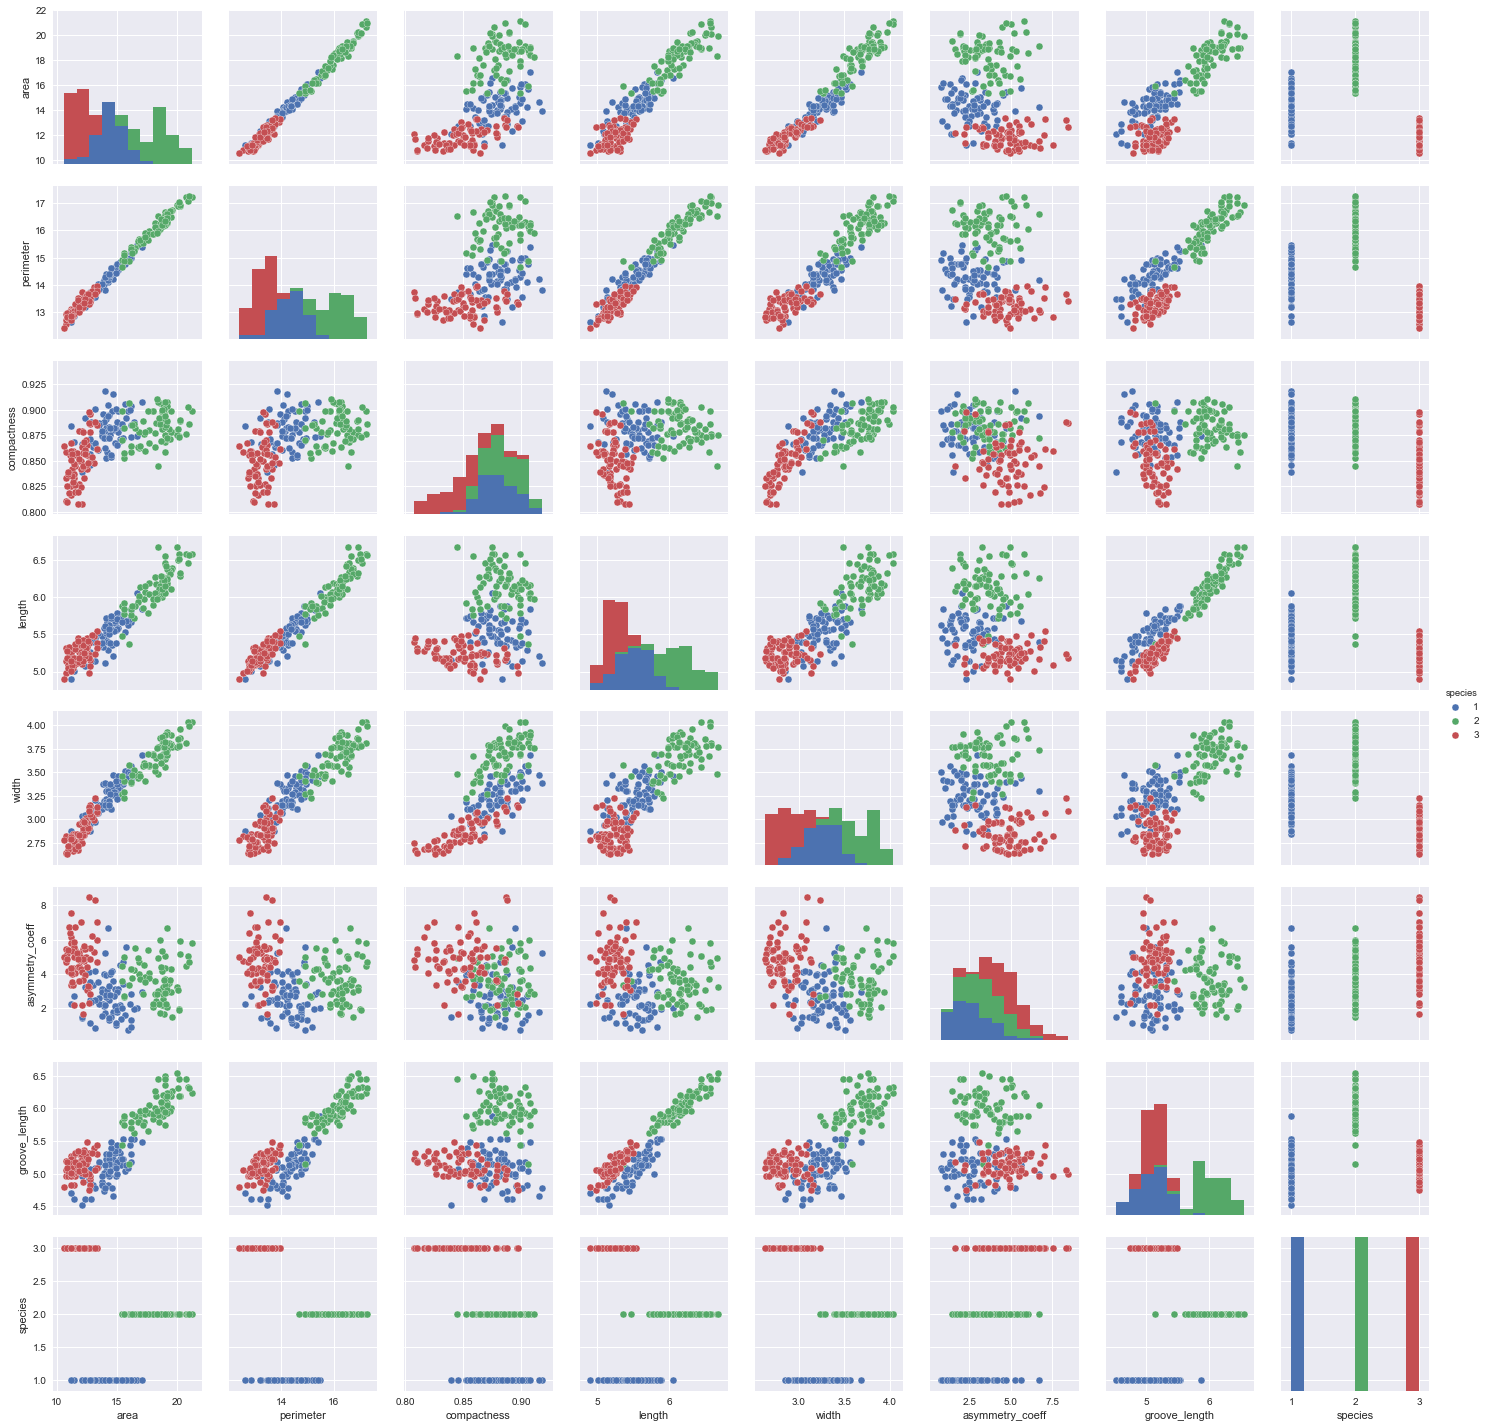

In [9]:
sns.pairplot(data=seeds,hue='species')

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [12]:
# A:
x= seeds.drop('species',axis=1)
y=seeds.species

In [14]:
# Scale the data
from sklearn.preprocessing import normalize

xn = normalize(x)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. Lets try using 2, 4 and 6 cluster splits. Run the clustering algorithm with each of those k values.

In [15]:
# A:
from sklearn.cluster import KMeans

# 2 Clusters
k_mean2 = KMeans(n_clusters=2)
k_mean2.fit(xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# 4 clusters

k_mean4 =KMeans(n_clusters=4)
k_mean4.fit(xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [17]:
# 6 clusters

k_mean6=KMeans(n_clusters=6)
k_mean6.fit(xn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for the models

In [19]:
# A:
labels_2=k_mean2.labels_
clusters_2=k_mean2.cluster_centers_
print labels_2 , clusters_2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1] [[ 0.66929175  0.63185432  0.03700914  0.24244146  0.14335061  0.12355609
   0.2308226 ]
 [ 0.59452087  0.65538982  0.04178222  0.2581907   0.14176089  0.24787804
   0.25185439]]


In [20]:
labels_4=k_mean4.labels_
clusters_4=k_mean4.cluster_centers_
print labels_4,clusters_4

[3 3 1 1 3 1 1 1 3 3 2 3 1 1 1 2 0 3 3 1 1 1 3 1 3 3 1 1 1 1 3 1 1 1 3 3 3
 3 1 0 1 1 1 2 1 3 3 1 1 3 1 2 1 1 3 3 1 3 3 1 1 1 1 1 3 1 3 1 3 1 2 2 2 3
 2 2 2 2 2 3 2 2 2 3 3 3 3 2 2 2 3 3 3 2 2 2 3 3 3 3 2 3 2 3 3 3 3 2 3 3 3
 2 3 2 2 3 2 3 2 3 2 2 2 3 2 2 2 3 3 2 3 3 2 2 2 2 2 3 3 2 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0] [[ 0.58749248  0.65603307  0.04202818  0.2591535   0.14127454  0.26205395
   0.25328319]
 [ 0.62964512  0.65917694  0.04168419  0.2560187   0.14733339  0.14278529
   0.2404358 ]
 [ 0.68246421  0.6127239   0.03410852  0.23350594  0.13945332  0.17492916
   0.22699804]
 [ 0.68411419  0.62573478  0.03575389  0.23941461  0.14252311  0.086917
   0.22870161]]


In [24]:
labels_6=k_mean6.labels_
clusters_6=k_mean6.cluster_centers_
print labels_6,clusters_6

[3 3 1 3 3 1 1 1 3 3 4 3 1 1 1 4 4 3 3 0 1 1 3 3 3 3 1 1 1 1 3 1 1 3 3 5 5
 5 1 2 1 1 1 4 1 3 3 1 1 3 1 4 1 1 3 3 1 3 3 3 1 1 1 0 3 1 3 3 3 1 4 4 4 5
 4 4 4 4 4 5 4 4 4 5 5 5 5 5 4 4 5 5 5 4 4 4 5 5 5 5 4 5 4 5 5 5 5 4 5 5 5
 5 5 4 4 5 4 5 5 5 4 5 4 5 4 4 4 5 5 4 5 5 4 4 4 4 5 1 1 4 0 2 2 2 0 2 1 0
 1 2 2 2 0 0 0 2 0 0 0 2 1 0 0 0 2 1 0 0 0 0 2 2 0 2 2 2 2 0 2 3 2 0 0 2 2
 0 0 0 2 2 2 0 0 2 0 0 2 0 1 1 2 1 0 2 0 0 0 2 0 2] [[ 0.59662032  0.66442426  0.04244551  0.26203072  0.14261472  0.21383746
   0.25528836]
 [ 0.63755305  0.65505229  0.04102218  0.25367881  0.14695966  0.13873912
   0.23749169]
 [ 0.58036966  0.65068556  0.04189992  0.25748961  0.14065282  0.29335149
   0.25232145]
 [ 0.65564274  0.65102356  0.03965859  0.25101767  0.14725162  0.07292262
   0.23151032]
 [ 0.67982692  0.61360367  0.03448039  0.23343219  0.14011417  0.18176598
   0.22668659]
 [ 0.70001446  0.61016572  0.03334147  0.23258029  0.13964832  0.10308825
   0.22720287]]


### 6. Compute the Silhouette Score to evaluate your clustering models

Silhouette score ranges from -1 to 1, with 1 being the best.

In [25]:
# A:
from sklearn.metrics import silhouette_score

In [27]:
silhouette_score(xn, labels_2)

0.50144852045607879

In [28]:
silhouette_score(xn,labels_4)

0.38175546074372152

In [29]:
silhouette_score(xn,labels_6)

0.36058133110524621

### 7. Plot `length` vs. `groove_length` using the clusters from each model.

Each time, compare to the actual species classification.


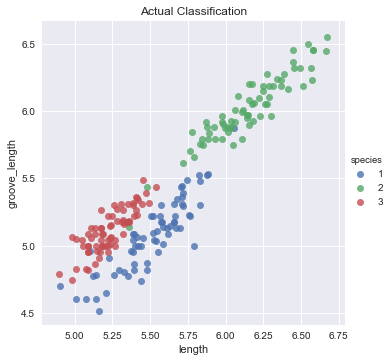

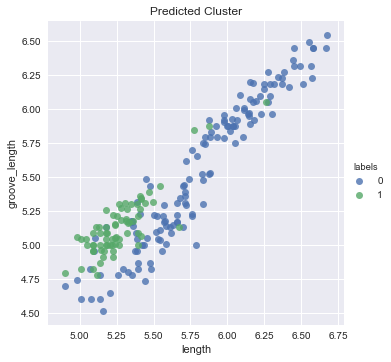

In [30]:
# A:
seeds2 = seeds
seeds2['labels'] = labels_2

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')

### 8. Evaluate a K-Means model with `k=3` clusters.

1. Construct the model.
- Print the labels and centroids.
- Evaluate the model with silhouette score.
- Plot `length` vs. `groove_length` and compare the clusters to the actual species.

In [32]:
# A:
k_mean3=KMeans(n_clusters=3)
k_mean3.fit(xn)
labels_3=k_mean3.labels_
clusters_3=k_mean3.cluster_centers_
print labels_3,clusters_3
silhouette_score(xn,labels_3)


[1 1 1 1 1 1 2 1 1 1 2 1 2 2 2 2 0 1 1 0 2 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1
 1 2 0 1 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 2 2 2 2 1
 2 2 2 2 2 1 2 2 2 1 1 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 1 2 2 1 2 1 2 1 2 2 2 1 2 2 2 1 1 2 1 1 2 2 2 2 2 1 1 2 0 0 0 0 0 0 1 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 1 0 0 0 2 0 0 0 0] [[ 0.5890222   0.65769788  0.04218078  0.25964956  0.14174127  0.25228245
   0.25373376]
 [ 0.67054001  0.63555118  0.03754245  0.24369327  0.14465753  0.09404806
   0.2312844 ]
 [ 0.66509806  0.62750951  0.03646614  0.24114117  0.1415701   0.16937951
   0.23066162]]


0.36029385561045951

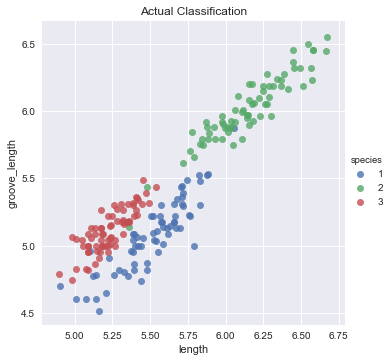

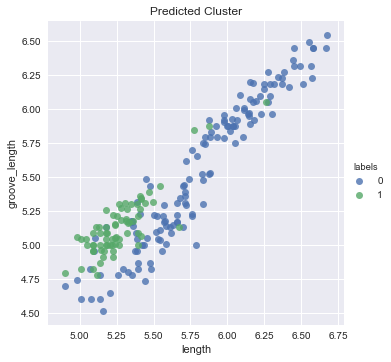

In [34]:
seed2=seeds
seed2['label']=labels_3
sns.lmplot(x='length', y='groove_length', data=seeds2, hue='species', 
           fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='length', y='groove_length', data=seeds2, hue='labels',
           fit_reg=False)
plt.title('Predicted Cluster')